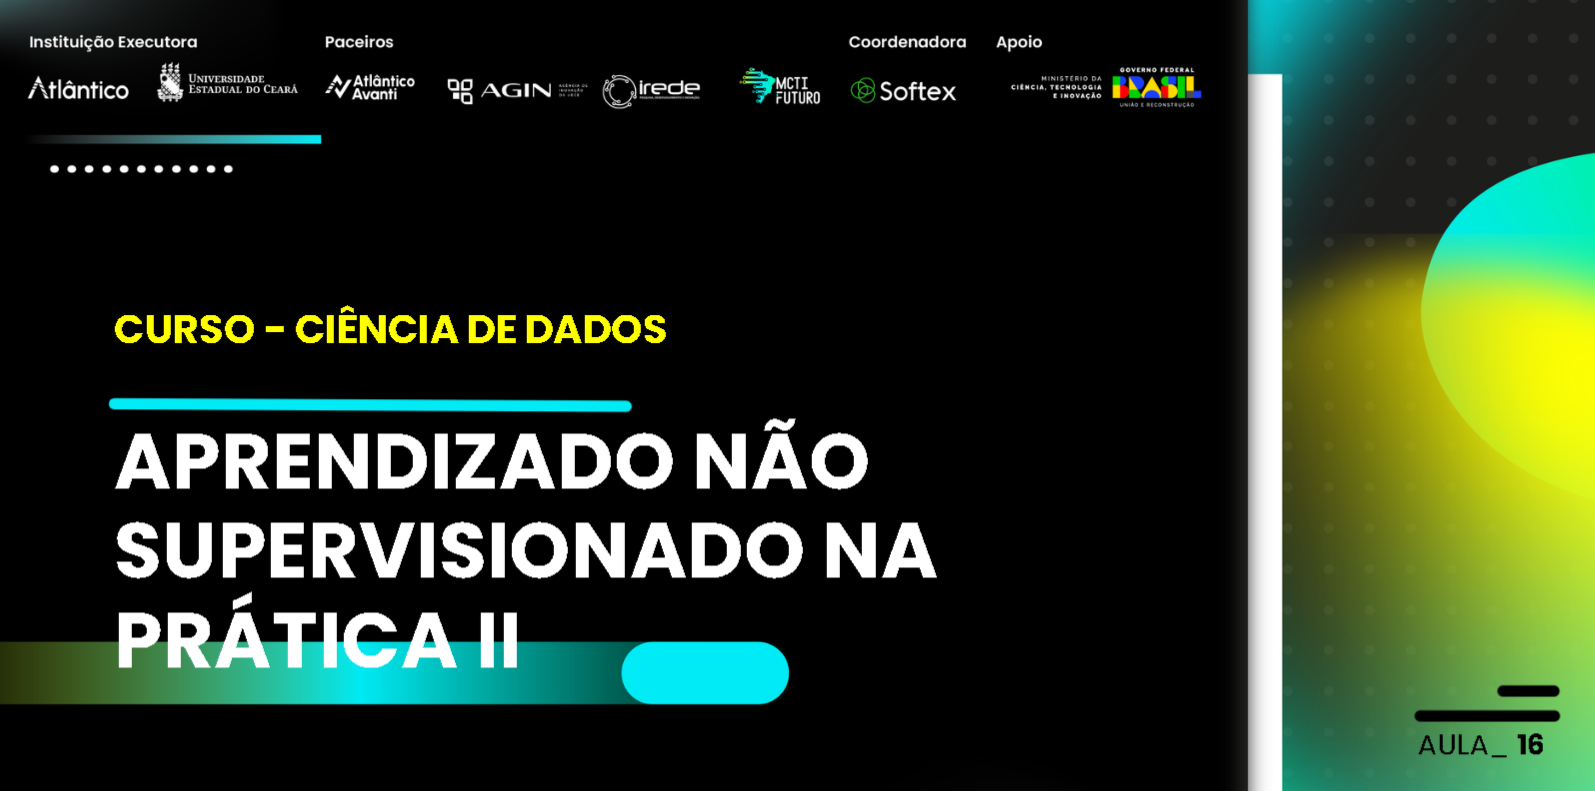

# Aula Prática: Introdução ao Aprendizado Não Supervisionado e PCA

## O aprendizado não supervisionado é um método de machine learning onde o objetivo é encontrar padrões ou estruturas em dados sem rótulos.
## Exemplos incluem clustering (agrupamento) ... Aula anterior..., redução de dimensionalidade e regras de associação.


---

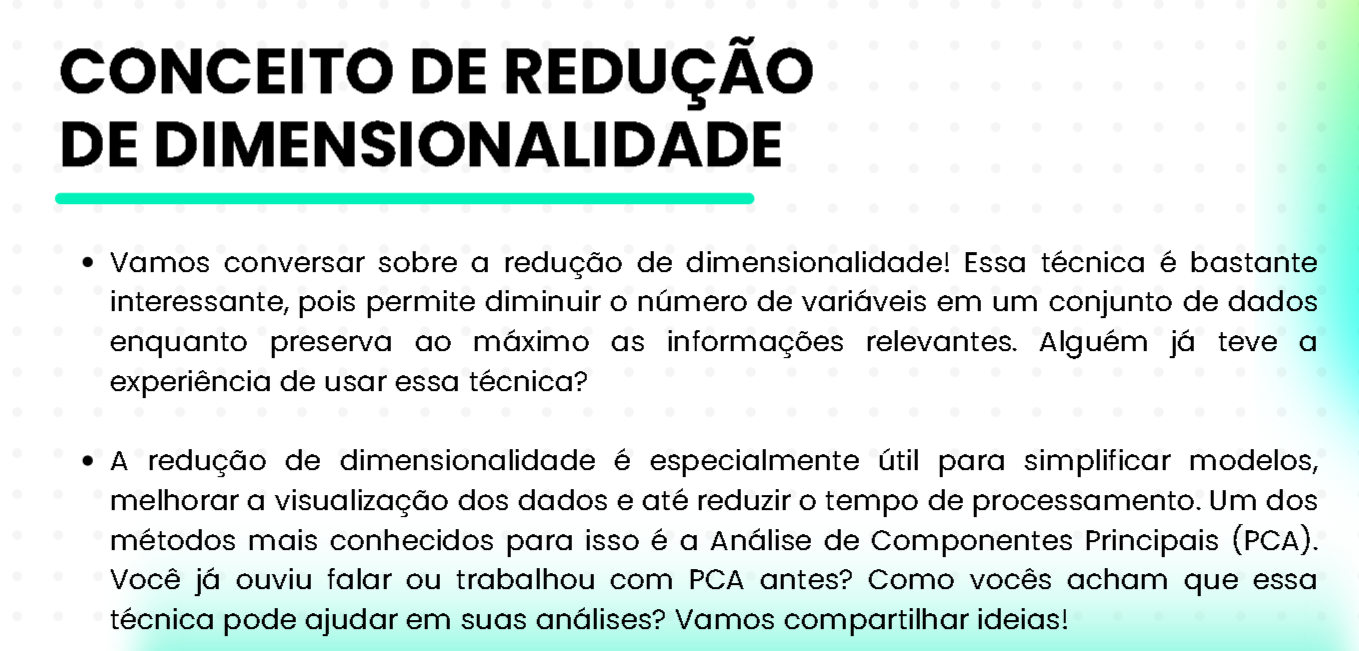

In [ ]:
pip install seaborn


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.stats import multivariate_normal
from IPython.display import HTML

Criemos uma nuvem de dados:

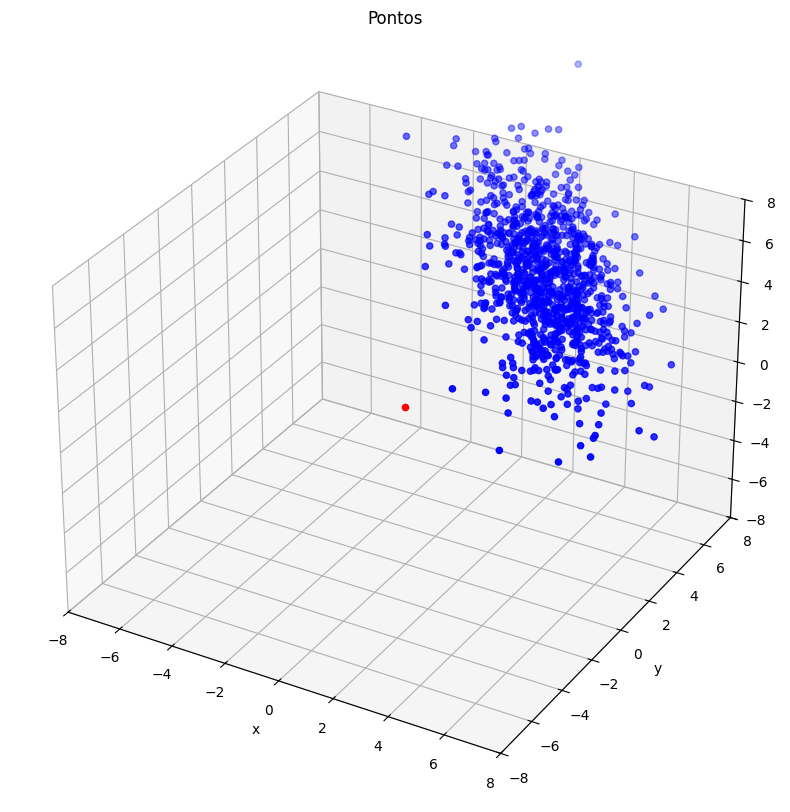

In [ ]:
num_samples = 1000

mu = np.array([5.0, 0.0, 8.0])

# The desired covariance matrix
Sigma = np.array([
        [  3.40, -2.75, -2.00],
        [ -2.75,  5.50,  1.50],
        [ -2.00,  1.50,  1.25]])

# Generate the random samples
np.random.seed(42)
initial_pts = np.random.multivariate_normal(mu, Sigma, size=num_samples)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.set( xlim=(-8.0, 8.0), ylim=(-8.0, 8.0), zlim=(-8.0, 8.0) )
ax.set_title('Pontos')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.scatter(0, 0, 0, color='r')
ax.scatter(initial_pts[:,0], initial_pts[:,1], initial_pts[:,2], color='b')

plt.show()

In [ ]:
print('Matriz de covariância:\n', np.cov(initial_pts, rowvar=False))
print('Matriz de correlação:\n', np.corrcoef(initial_pts, rowvar=False))

Matriz de covariância:
 [[ 3.12928176 -2.52033669 -1.83899976]
 [-2.52033669  5.41581698  1.33839383]
 [-1.83899976  1.33839383  1.1536416 ]]
Matriz de correlação:
 [[ 1.         -0.61221538 -0.96788528]
 [-0.61221538  1.          0.53544699]
 [-0.96788528  0.53544699  1.        ]]


#### Matriz de Covariância

A matriz de covariância mostra como duas variáveis variam juntas (covariam). Os elementos diagonais representam a variância de cada variável, enquanto os elementos fora da diagonal mostram as covariâncias entre pares de variáveis.

**Diagonal principal (variância):**

- Variância da variável 1: 3.19 — A variável 1 tem alta variabilidade.
- Variância da variável 2: 5.41 — A variável 2 é a mais dispersa.
- Variância da variável 3: 1.15 — A variável 3 é a menos dispersa.

**Elementos fora da diagonal (covariância):**

- Covariância entre as variáveis 1 e 2: −2.52 — As variáveis 1 e 2 têm uma relação negativa (quando uma aumenta, a outra tende a diminuir).
- Covariância entre as variáveis 1 e 3: −1.83 — As variáveis 1 e 3 também têm uma relação negativa.
- Covariância entre as variáveis 2 e 3: 1.33 — As variáveis 2 e 3 têm uma relação positiva (quando uma aumenta, a outra tende a aumentar também).

#### Matriz de Correlação


A matriz de correlação mede o grau de associação linear entre as variáveis, com valores padronizados entre −1 e 1:
    
    
- '1': Correlação perfeita positiva.
- '−1': Correlação perfeita negativa.
- '0': Nenhuma correlação.

**Diagonal principal:** Sempre 1, pois a correlação de uma variável consigo mesma é perfeita.


**Elementos fora da diagonal :**

- Correlação entre variáveis 1 e 2: (−0.64) Existe uma correlação negativa moderada entre as variáveis 1 e 2.
- Correlação entre variáveis 1 e 3: (−0.97) Existe uma forte correlação negativa entre as variáveis 1 e 3.
- Correlação entre variáveis 2 e 3: (0.57)  Existe uma correlação positiva moderada entre as variáveis 2 e 3.

---

#### O que esses dados representam?

**Variabilidade das variáveis (covariância):**

A variância da variável 2 (5.41) sugere que é a mais dispersa, enquanto a variável 3 (1.15) é a menos variável.

**Relacionamento entre variáveis (covariância e correlação):**

- A variável 1 tem forte relação negativa com a variável 3 (−1.83).
- A variável 2 tem uma relação moderada positiva com a variável 3 (1.33).

**Implicações práticas:**

Se essas variáveis representarem características como medidas de desempenho, indicadores financeiros ou dados de sensores, os resultados sugerem quais estão mais associadas ou antagônicas.

- A relação forte e negativa (−1.83) entre as variáveis 1 e 3 sugere que mudanças em uma provavelmente resultam no efeito oposto na outra.

Essa análise é crucial para entender padrões, dependências e possíveis implicações em um conjunto de dados multidimensional.

Vamos centralizar os dados:

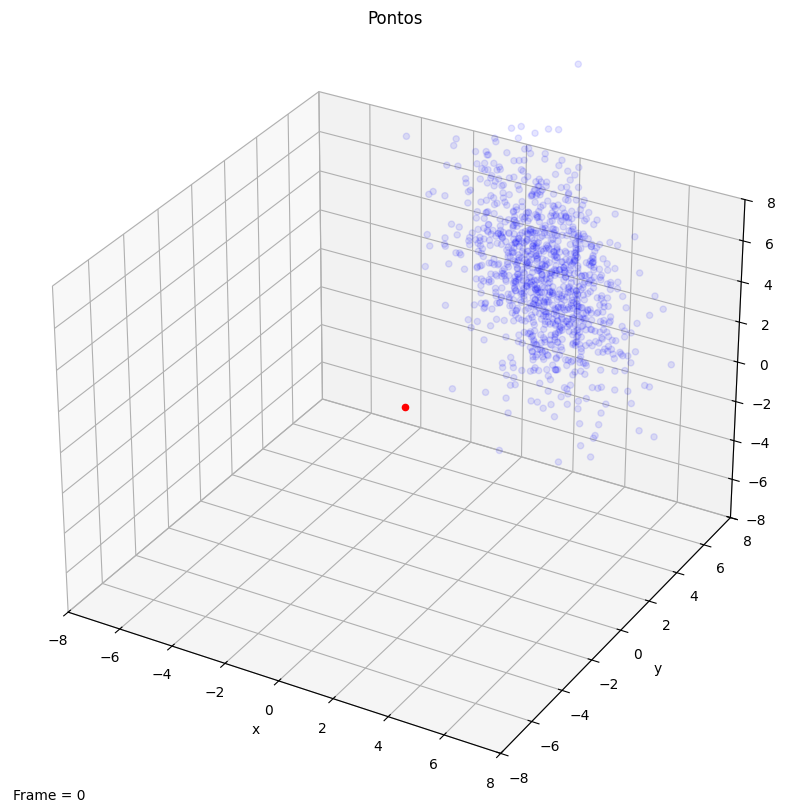

In [ ]:
time_steps = 50

# actual sample mean
mu = np.mean(initial_pts, axis=0)

pts = []
for i in range(time_steps+1):
    pts.append(initial_pts - (i/time_steps) * mu)

fig = plt.figure(figsize=(10,10))

def animate(i):
    fig.clear()
    ax = fig.add_subplot(111, projection='3d')
    ax.set( xlim=(-8.0, 8.0), ylim=(-8.0, 8.0), zlim=(-8.0, 8.0) )
    ax.set_title('Pontos')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.text(0.02, 0.95, 0.01, 'Frame = %d' % i, transform=ax.transAxes)

    ax.scatter(0, 0, 0, color='r')
    ax.scatter(pts[i][:,0], pts[i][:,1], pts[i][:,2], color='b', alpha=0.1)
    if i==0:
        plt.pause(2)

ani = animation.FuncAnimation(fig, animate, \
                              interval=100, \
                              frames=range(time_steps+1), \
                              repeat=False)
HTML(ani.to_html5_video())

Agora que centralizamos os dados, vamos desenhar o plano "mágico":

Singular values: [87.90572319 43.74752766  6.91225403]
Eigenvalues: [7727.4161704  1913.84617619   47.7792558 ]
Cumulative energy: [0.79754185 0.99506873 1.        ]


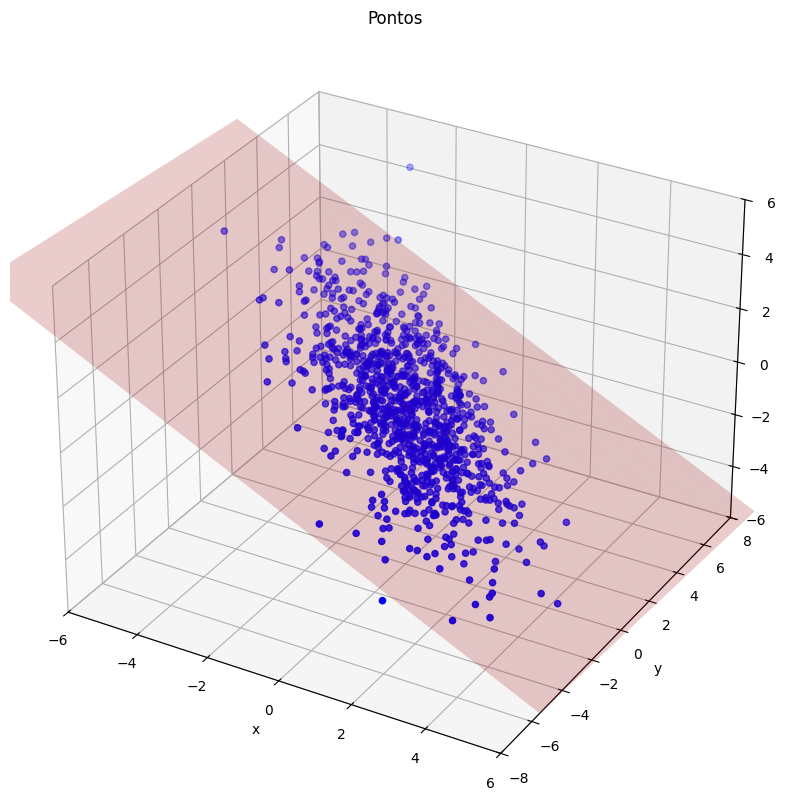

In [ ]:
X = initial_pts - mu # centralized data
U, S, Vt = np.linalg.svd(X)
print('Singular values:', S)
print('Eigenvalues:', S**2)
energy = np.cumsum(S**2) / np.sum(S**2)
print('Cumulative energy:', energy)
xx, yy = np.meshgrid(range(-8, 8), range(-8, 8))
normal = np.cross(Vt[0,:], Vt[1,:])
normal = normal / np.linalg.norm(normal)
z = (-normal[0] * xx - normal[1] * yy) * 1./normal[2]

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.set( xlim=(-6.0, 6.0), ylim=(-8.0, 8.0), zlim=(-6.0, 6.0) )
ax.set_title('Pontos')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
#ax.view_init(elev=-3, azim=90)

ax.scatter(0, 0, 0, color='r')
ax.scatter(X[:,0], X[:,1], X[:,2], color='b')
ax.plot_surface(xx, yy, z, color='r', alpha=0.2)

plt.show()

Por fim, vamos "aproximar" os dados, projetando-os no plano "mágico":

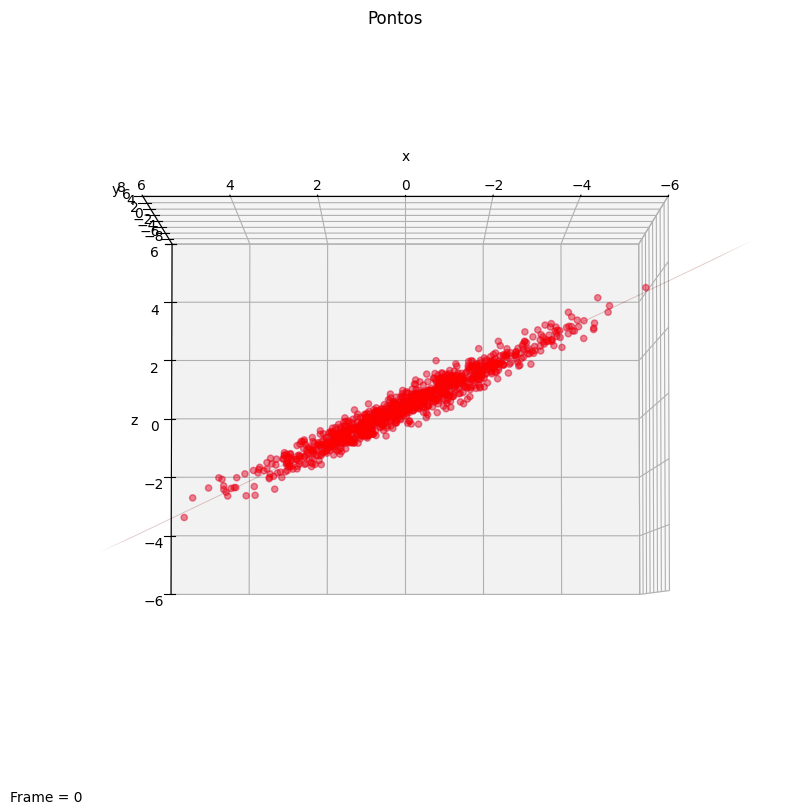

In [ ]:
time_steps = 100

proj_pts = np.dot( np.dot(X, Vt[:2,:].T), Vt[:2,:] )

pts = []
for i in range(time_steps+1):
    pts.append(((time_steps-i)/(time_steps))*X + (i/time_steps)*proj_pts)

fig = plt.figure(figsize=(10,10))

def animate(i):
    fig.clear()
    ax = fig.add_subplot(111, projection='3d')
    ax.set( xlim=(-6.0, 6.0), ylim=(-8.0, 8.0), zlim=(-6.0, 6.0) )
    ax.set_title('Pontos')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.view_init(elev=-3, azim=90)
    ax.text(0.02, 0.95, 0.01, 'Frame = %d' % i, transform=ax.transAxes)

    ax.scatter(X[:,0], X[:,1], X[:,2], color='b', alpha=0.1)
    ax.scatter(pts[i][:,0], pts[i][:,1], pts[i][:,2], color='r', alpha=0.4)
    ax.plot_surface(xx, yy, z, color='r', alpha=0.2)

ani = animation.FuncAnimation(fig, animate, \
                              interval=100, \
                              frames=range(time_steps+1), \
                              repeat=False)
HTML(ani.to_html5_video())

---

## PCA no Contexto do Aprendizado Não Supervisionado

---

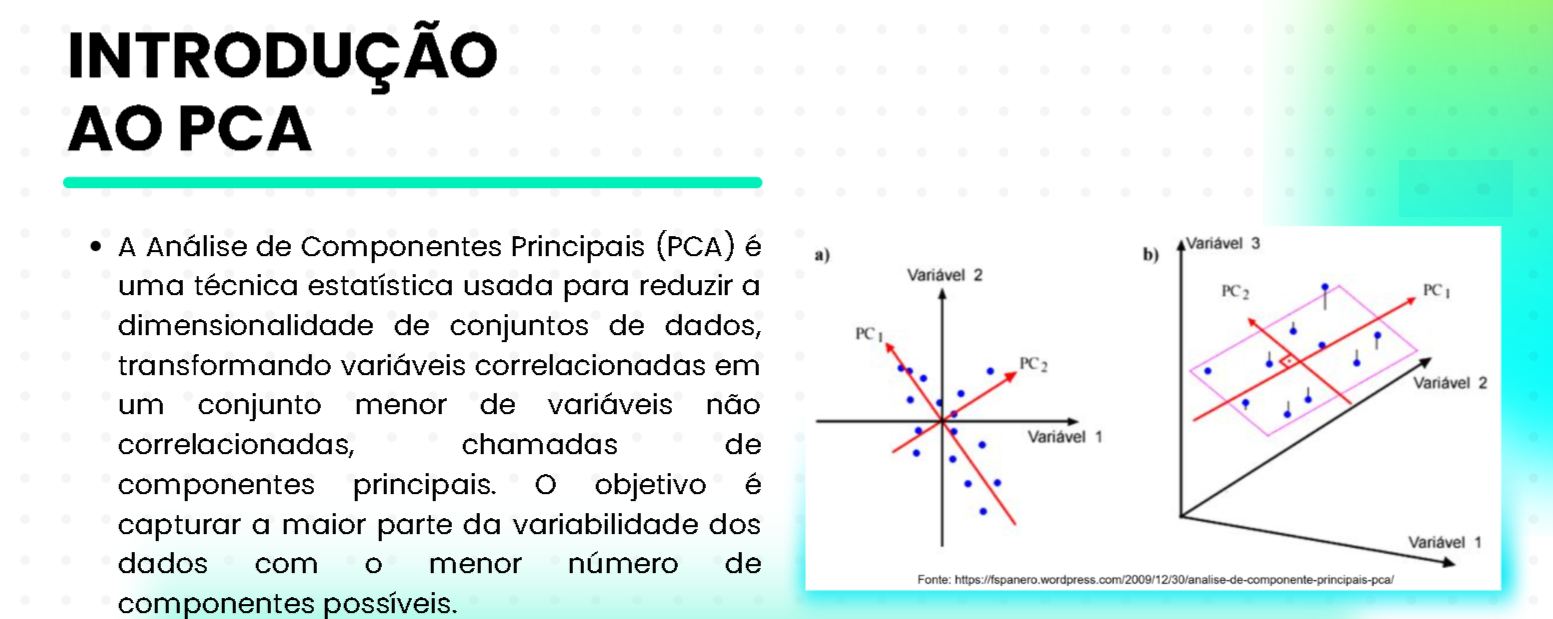

### Definição
- O PCA é um método de redução de dimensionalidade que transforma um conjunto de variáveis possivelmente correlacionadas em um conjunto menor de variáveis chamadas **componentes principais**.
- **Objetivos do PCA:**
  - Reduzir a dimensionalidade do dataset preservando a máxima variância.
  - Facilitar a visualização de dados de alta dimensionalidade.
  - Remover redundância em variáveis correlacionadas.

---

---

### Etapas de Execução PCA

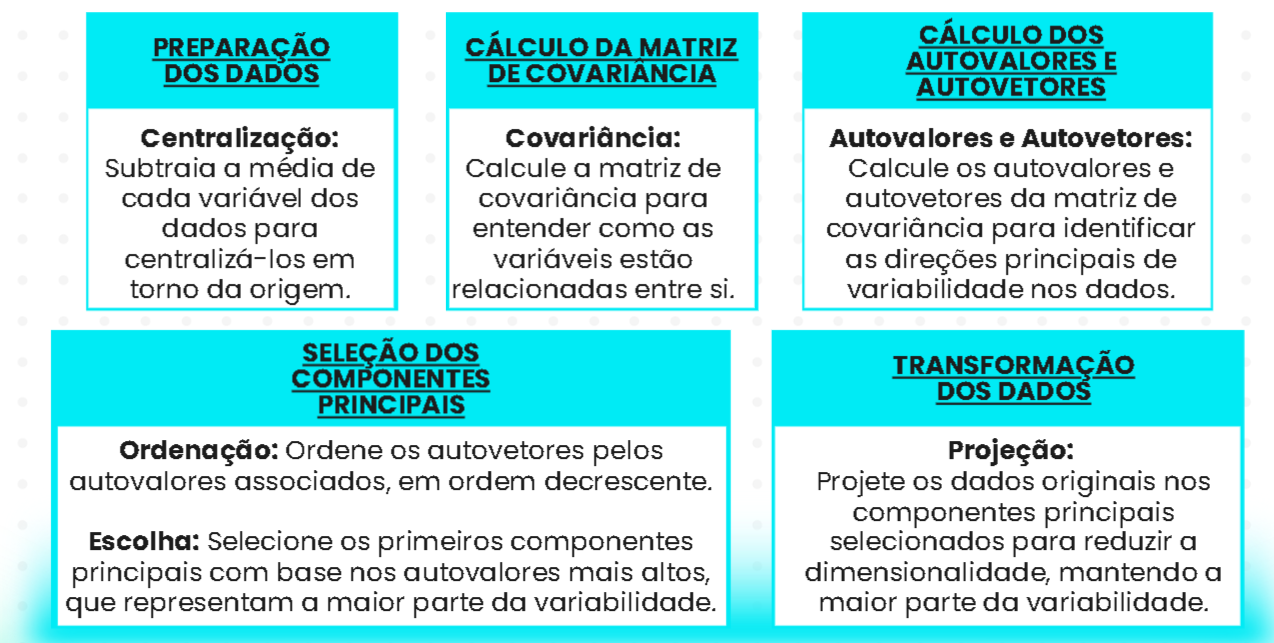

### Etapa 1: Preparação dos Dados
Criamos um dataset fictício com variáveis climáticas para aplicar o PCA.


In [1]:
import numpy as np
import pandas as pd

# Dataset fictício com variáveis climáticas
np.random.seed(42)
dados = {
    'Temperatura (C)': np.random.normal(25, 5, 100),
    'Umidade (%)': np.random.normal(70, 10, 100),
    'Precipitação (mm)': np.random.normal(100, 20, 100)
}

# Criar DataFrame
df = pd.DataFrame(dados)
print("Visualização inicial dos dados:")
print(df.head())

Visualização inicial dos dados:
   Temperatura (C)  Umidade (%)  Precipitação (mm)
0        27.483571    55.846293         107.155747
1        24.308678    65.793547         111.215691
2        28.238443    66.572855         121.661025
3        32.615149    61.977227         121.076041
4        23.829233    68.387143          72.446613


---

### Etapa 2: Cálculo da Matriz de Covariância
A matriz de covariância mede como duas variáveis variam juntas.


In [2]:
# Padronizar os dados (necessário para PCA)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
dados_padronizados = scaler.fit_transform(df)

# Calcular a matriz de covariância
matriz_cov = np.cov(dados_padronizados.T)

print("Matriz de covariância:")
matriz_cov


Matriz de covariância:


array([[ 1.01010101, -0.13780021,  0.19276759],
       [-0.13780021,  1.01010101, -0.03700176],
       [ 0.19276759, -0.03700176,  1.01010101]])

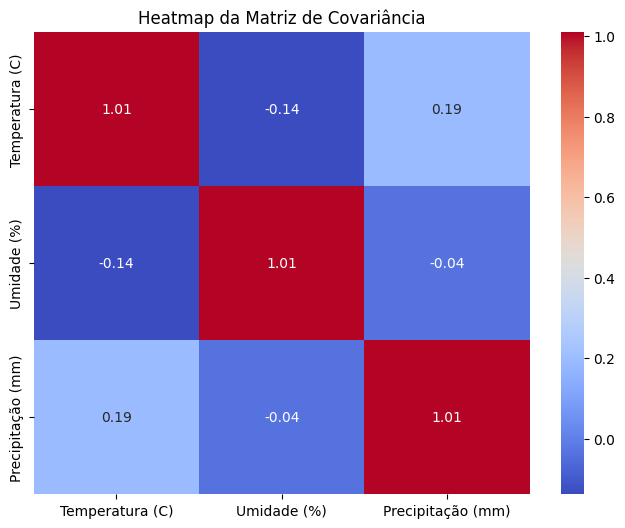

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Criar o heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_cov, annot=True, fmt=".2f", cmap="coolwarm", xticklabels=df.columns, yticklabels=df.columns)

plt.title("Heatmap da Matriz de Covariância")
plt.show()

---

### Etapa 3: Cálculo dos Autovalores e Autovetores
Os autovalores representam a variância explicada, e os autovetores definem a direção dos componentes principais.


In [4]:
autovalores, autovetores = np.linalg.eig(matriz_cov)

print("Autovalores:")
print(autovalores)


Autovalores:
[1.26547347 0.78964597 0.97518358]


#### Os autovalores e autovetores obtidos no PCA têm significados importantes no contexto da análise. Vamos interpretar esses valores:

#### Autovalores
Os autovalores representam a quantidade de variância explicada por cada componente principal. No exemplo:

```[1.26547347 0.78964597 0.97518358]```

- O primeiro autovalor (1.26547347):
Corresponde ao primeiro componente principal (PC1).
Indica que este componente é responsável por explicar a maior parte da variância nos dados em relação aos outros componentes.

- O segundo autovalor (0.78964597):
Corresponde ao segundo componente principal (PC2).
Explica menos variância em comparação ao primeiro componente.

- O terceiro autovalor (0.97518358):
Corresponde ao terceiro componente principal (PC3).
Explica mais variância que o segundo componente, mas menos que o primeiro.


A soma dos autovalores fornece a variância total dos dados padronizados. A proporção de cada autovalor em relação à soma dos autovalores é a **variância explicada** por cada componente principal.

---

#### Autovetores
Os autovetores definem as direções dos componentes principais no espaço original das variáveis. Cada linha no autovetor indica como cada variável original contribui para formar um componente principal.

In [6]:
print(autovetores)


[[ 0.67987019 -0.73143236  0.05275631]
 [-0.45068202 -0.35999193  0.81687914]
 [ 0.57849999  0.5791481   0.57439119]]


Autovetores:

- [ 0.67987019 -0.73143236  0.05275631]   <- Variável 1 (Temperatura)

- [-0.45068202 -0.35999193  0.81687914]   <- Variável 2 (Umidade)

- [ 0.57849999  0.5791481   0.57439119]  <- Variável 3 (Precipitação)

#### Interpretação:
- Primeiro componente principal (PC1):

Representado pela primeira coluna: [0.67987019, -0.45068202, 0.57849999].
Esse vetor indica que o PC1 é uma combinação linear das três variáveis:
É mais fortemente influenciado por Temperatura (peso 0.67987019) e Precipitação (peso 0.57849999), com uma influência negativa de Umidade (-0.45068202).

- Segundo componente principal (PC2):

Representado pela segunda coluna: [-0.73143236, -0.35999193, 0.5791481].
Esse vetor sugere que o PC2 é influenciado principalmente por Temperatura (negativamente, -0.73143236) e Precipitação (positivamente, 0.5791481), enquanto a Umidade tem uma menor contribuição (-0.35999193).

- Terceiro componente principal (PC3):

Representado pela terceira coluna: [0.05275631, 0.81687914, 0.57439119].
Aqui, o PC3 é fortemente influenciado por Umidade (peso 0.81687914) e Precipitação (peso 0.57439119), enquanto Temperatura tem uma contribuição menor (0.05275631).


---

### Em resuno:

- Autovalores indicam a variância explicada por cada componente principal. Componentes com autovalores mais altos explicam mais variância nos dados.

- Autovetores definem a direção dos componentes principais no espaço original das variáveis. Cada componente é uma combinação linear das variáveis originais com os pesos fornecidos pelos autovetores.

---

### Etapa 4: Seleção dos Componentes Principais
Selecionamos os componentes principais com base nos autovalores mais altos.

Exemplo de cálculo da **variância explicada**:

In [ ]:
variancia_explicada = autovalores / sum(autovalores)
print(variancia_explicada)

[0.41760625 0.26058317 0.32181058]


#### Isso significa que o primeiro componente explica 41,7% da variância total dos dados, o segundo 26,05%, e o terceiro 32,18%.

In [ ]:
# Selecionar os componentes principais
indices_ordenados = np.argsort(autovalores)[::-1]
componentes_principais = autovetores[:, indices_ordenados[:3]]

print("Componentes principais selecionados:")
print(componentes_principais)


Componentes principais selecionados:
[[ 0.67987019  0.05275631 -0.73143236]
 [-0.45068202  0.81687914 -0.35999193]
 [ 0.57849999  0.57439119  0.5791481 ]]


---

### Etapa 5: Transformação dos Dados
Projetamos os dados originais no novo espaço dos componentes principais.

In [ ]:
# Transformar os dados
dados_transformados = np.dot(dados_padronizados, componentes_principais)

# Criar DataFrame com os componentes principais
df_transformado = pd.DataFrame(dados_transformados, columns=['Componente 1', 'Componente 2','componente 3'])

print("Dados transformados:")
print(df_transformado.head())
dados_padronizados

Dados transformados:
   Componente 1  Componente 2  componente 3
0      1.291744     -1.046664      0.216535
1      0.450392     -0.119319      0.462110
2      1.284770      0.271717      0.076719
3      2.145955     -0.088378     -0.473178
4     -0.784377     -0.933696     -0.599272


array([[ 6.64619211e-01, -1.51511491e+00,  2.71485092e-01],
       [-3.80889416e-02, -4.66809161e-01,  4.59646163e-01],
       [ 8.31697213e-01, -3.84680655e-01,  9.43742895e-01],
       [ 1.80040643e+00, -8.68997500e-01,  9.16631388e-01],
       [-1.44205981e-01, -1.93479288e-01, -1.33713538e+00],
       [-1.44187812e-01,  4.02308821e-01, -9.29437174e-01],
       [ 1.86258212e+00,  1.96427825e+00,  4.17240499e-01],
       [ 9.64216079e-01,  1.60475338e-01,  4.16082490e-01],
       [-4.04627405e-01,  2.47917188e-01,  4.17252011e-01],
       [ 7.15355233e-01, -1.01961915e-01,  3.51100042e+00],
       [-3.97924677e-01, -2.04563077e+00,  4.69013549e-01],
       [-4.00483353e-01, -5.14480419e-02,  9.92419265e-01],
       [ 3.82694332e-01,  3.99684655e-02,  8.24125027e-01],
       [-2.00243618e+00,  2.57241727e+00,  5.43630875e-01],
       [-1.79398218e+00, -2.26228393e-01, -3.52381014e-01],
       [-5.07340421e-01,  2.94284011e-01,  6.43346483e-01],
       [-1.00594105e+00, -6.00875111e-02

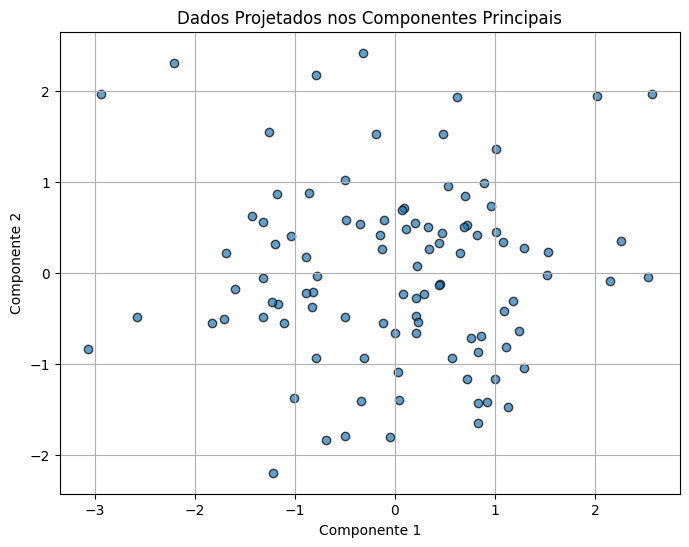

In [ ]:
## Visualização dos Dados Transformados
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df_transformado['Componente 1'], df_transformado['Componente 2'], alpha=0.7, edgecolors='k')
plt.title("Dados Projetados nos Componentes Principais")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.grid()
plt.show()

#### Elementos do Gráfico

- Eixo X: Representa o primeiro componente principal (PC1), que explica a maior parte da variância nos dados (de acordo com o autovalor associado a ele).
Valores positivos e negativos indicam como as amostras foram projetadas ao longo da direção do PC1.


- Eixo Y: Representa o segundo componente principal (PC2), que explica a segunda maior parte da variância (de acordo com seu autovalor).
Assim como no eixo X, valores positivos e negativos indicam as projeções das amostras, mas ao longo da direção do PC2.


- Pontos no gráfico:
Cada ponto corresponde a uma amostra do dataset original projetada no novo espaço bidimensional definido pelos componentes principais (PC1 e PC2).
A posição de cada ponto é calculada pela combinação linear das variáveis originais com os pesos dos autovetores (isto é, a transformação realizada pelo PCA).


#### Interpretação do Gráfico
O gráfico mostra como os dados foram projetados nos dois primeiros componentes principais. A interpretação depende do contexto e do dataset utilizado. No caso:

- Clusters ou agrupamentos visíveis:


Se houver grupos de pontos concentrados em diferentes regiões do gráfico, isso pode indicar padrões ou agrupamentos naturais nos dados.
Esses padrões são úteis para aprendizado não supervisionado, como em tarefas de clustering.


- Distribuição dos pontos:

A dispersão dos pontos ao longo de cada eixo reflete a quantidade de variância capturada por cada componente principal.
Por exemplo, se os pontos estão mais espalhados no eixo X (PC1) do que no eixo Y (PC2), isso indica que o PC1 explica mais variância nos dados.


- Relação entre as variáveis originais:

O PCA reduz a dimensionalidade combinando variáveis correlacionadas. Se os pontos formam um padrão linear ou curvilíneo, isso pode refletir a relação entre as variáveis no espaço original.

---

#### **Como usar o PCA com a Biblioteca da Scikit-learn**

In [9]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine
import pandas as pd

samples = load_wine()
target = samples.target
samples = samples.data
scaler = StandardScaler()
scaled_samples = scaler.fit_transform(samples)


# Create a PCA model with  components: pca
pca = PCA(n_components=2)

# Fit the PCA instance to the scaled samples
pca.fit(scaled_samples)

# Transform the scaled samples: pca_features
pca_features = pca.transform(scaled_samples)

# Print the shape of pca_features
#print(pca_features)
pca_features.shape

(178, 2)

Observe que com 2 componentes o resultado da classificação em cima do dataset de vinho foi melhor que o resultado observado com todos os componentes. Basta substituir na função train_test_split o parametro pca_feature por scaled_samples que você pode notar esse caso. Em scale_samples, apesar do resultado muito bom, não foi superior a aplicação do PCA utilizando os 2 componentes principais.

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

knn = KNeighborsClassifier(n_neighbors=6)

X_train, X_test, y_train, y_test = train_test_split(pca_features, target, test_size=0.3, random_state=42)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        19
           1       0.95      1.00      0.98        21
           2       1.00      1.00      1.00        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



In [12]:
knn = KNeighborsClassifier(n_neighbors=6)

X_train, X_test, y_train, y_test = train_test_split(scaled_samples, target, test_size=0.3, random_state=42)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95        19
           1       1.00      0.90      0.95        21
           2       1.00      1.00      1.00        14

    accuracy                           0.96        54
   macro avg       0.97      0.97      0.97        54
weighted avg       0.97      0.96      0.96        54



## Introdução ao Métodos de Associação

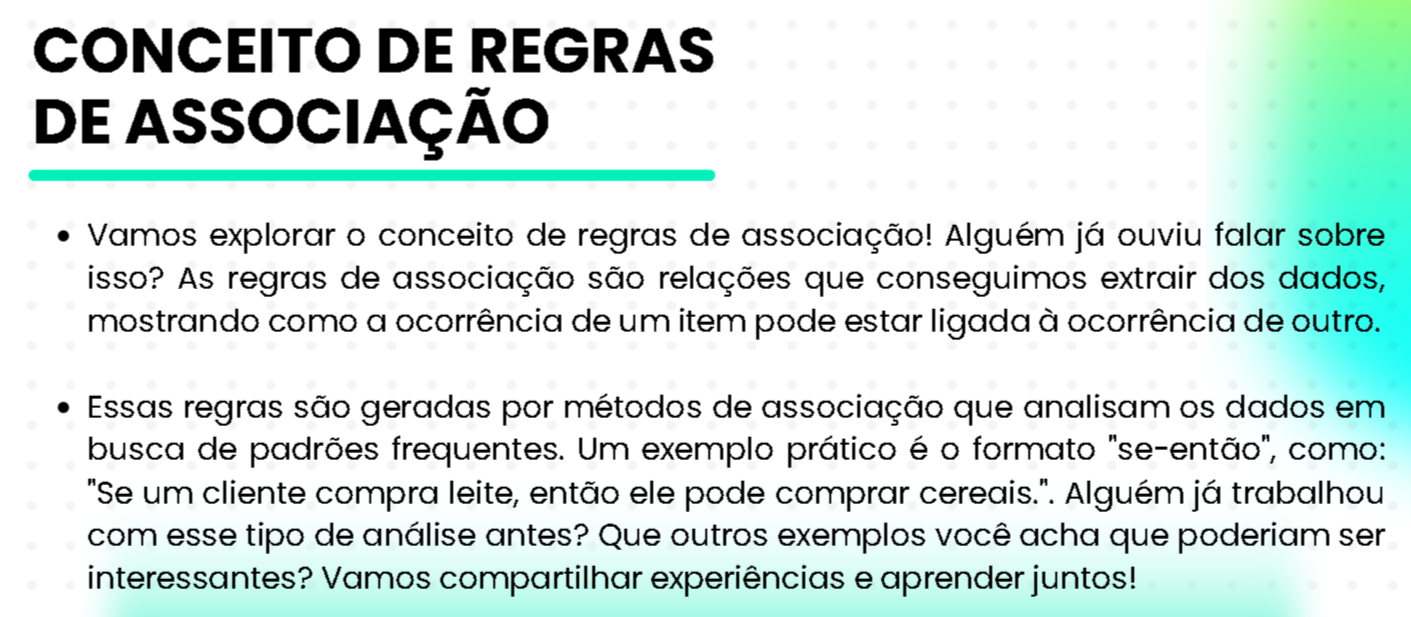

#### Dados de Exemplo:

O dataset utilizado no exemplo representa transações realizadas em um supermercado, onde cada linha corresponde a uma compra feita por um cliente e os itens listados na linha indicam os produtos adquiridos nessa transação. Esse tipo de conjunto de dados é frequentemente utilizado em análises de regras de associação, como na técnica conhecida como "Market Basket Analysis" (análise de cesta de compras).

**Estrutura do Dataset**

O dataset é composto por transações que incluem os seguintes itens:

- Leite
- Pão
- Manteiga
- Café

Cada transação contém uma combinação de produtos comprados juntos.

**Exemplo de transações:**

1) O cliente 1 comprou "leite", "pão" e "manteiga".

2) O cliente 2 comprou "leite" e "pão".

3) cliente 3 comprou "pão", "manteiga" e "café".

**Formato Binário**

Para realizar a análise, o dataset foi transformado em um formato binário utilizando a técnica de one-hot encoding. Nesse formato, cada coluna representa um item, e os valores indicam:

- 1 (TRUE): O item foi comprado na transação.

- 0 (FALSE): O item não foi comprado na transação.

**Objetivo do Dataset**

O objetivo desse conjunto de dados é identificar padrões e associações entre os itens comprados pelos clientes. Por exemplo:

- Quais produtos são frequentemente comprados juntos?

- Se um cliente compra "pão" e "manteiga", qual é a probabilidade de ele também comprar "leite"?

- Existem combinações de produtos que podem ser recomendadas para promoções ou vendas cruzadas/casadas?


In [ ]:
import pandas as pd

# Criando um dataset de transações
transactions = [
    ['leite', 'pão', 'manteiga'],
    ['leite', 'pão'],
    ['pão', 'manteiga', 'café'],
    ['leite', 'manteiga'],
    ['leite', 'pão', 'manteiga', 'café'],
]



#### Convertendo para DataFrame de transações binárias

In [ ]:
from mlxtend.preprocessing import TransactionEncoder

encoder = TransactionEncoder()
onehot = encoder.fit(transactions).transform(transactions)
df = pd.DataFrame(onehot, columns=encoder.columns_)

print("Dados em formato binário:")
print(df)

Dados em formato binário:
    café  leite  manteiga    pão
0  False   True      True   True
1  False   True     False   True
2   True  False      True   True
3  False   True      True  False
4   True   True      True   True


#### Aplicando o Algoritmo Apriori
Encontrar itemsets frequentes com Apriori


```apriori(df, min_support=0.6, use_colnames=True):```

- Encontra itemsets frequentes com suporte mínimo de 60%.
- use_colnames=True garante que os nomes dos itens sejam exibidos.


O Apriori é um algoritmo para mineração de regras de associação que utiliza a propriedade "antimonotônica" (ao aumentar o conjunto de entrada, o valor da propriedade ou da função não aumenta, podendo diminuir ou se manter igual) dos itemsets frequentes. Isso significa que, se um itemset não é frequente, nenhum de seus superconjuntos será frequente.

A ideia:

1. Inicializar:
   - Definir um conjunto de transações T.
   - Definir o suporte mínimo (min_support).
   - Criar um conjunto vazio F (itemsets frequentes).

2. Primeira Passagem:
   - Calcular o suporte de cada item individual em T.
   - Adicionar ao F todos os itens cujo suporte >= min_support.

3. Iteração:
   Enquanto houver itemsets frequentes no nível anterior:
   a. Gerar candidatos:
      - Combinar itemsets frequentes do nível atual (F_k) para criar candidatos (C_k+1).
      - Garantir que os candidatos sigam a propriedade antimonotônica.
   b. Contar suporte:
      - Escanear as transações T e contar a frequência dos candidatos (C_k+1).
   c. Selecionar frequentes:
      - Adicionar ao F os candidatos de C_k+1 cujo suporte >= min_support.

4. Terminar:
   - Retornar todos os itemsets frequentes F.


---

In [ ]:
from mlxtend.frequent_patterns import apriori
frequent_itemsets = apriori(df, min_support=0.6, use_colnames=True)
print("Itemsets frequentes encontrados pelo Apriori:")
print(frequent_itemsets)

Itemsets frequentes encontrados pelo Apriori:
   support           itemsets
0      0.8            (leite)
1      0.8         (manteiga)
2      0.8              (pão)
3      0.6  (manteiga, leite)
4      0.6       (pão, leite)
5      0.6    (manteiga, pão)


#### Verificar se itemsets frequentes não estão vazios e gerar regras


In [ ]:
if not frequent_itemsets.empty:
    # Gerar regras de associação
    rules = []

    for index, row in frequent_itemsets.iterrows():
        for item in row['itemsets']:
            antecedent = frozenset([item])
            consequent = row['itemsets'] - antecedent

            if len(consequent) > 0:
                support = row['support']

                # Obter suporte para antecedente e consequente
                antecedent_support = frequent_itemsets[frequent_itemsets['itemsets'] == antecedent]['support']
                consequent_support = frequent_itemsets[frequent_itemsets['itemsets'] == consequent]['support']

                # Calcular confiança e lift se os suportes forem encontrados
                if not antecedent_support.empty and not consequent_support.empty:
                    confidence = support / antecedent_support.values[0]
                    lift = confidence / consequent_support.values[0]
                    rules.append({
                        'antecedent': antecedent,
                        'consequent': consequent,
                        'support': support,
                        'confidence': confidence,
                        'lift': lift
                    })

    # Exibir regras
    rules_df = pd.DataFrame(rules)
    print("\nRegras de associação (calculadas 'manualmente'):")
    print(rules_df)
else:
    print("Nenhum itemset frequente foi encontrado.")


Regras de associação (calculadas 'manualmente'):
   antecedent  consequent  support  confidence    lift
0  (manteiga)     (leite)      0.6        0.75  0.9375
1     (leite)  (manteiga)      0.6        0.75  0.9375
2       (pão)     (leite)      0.6        0.75  0.9375
3     (leite)       (pão)      0.6        0.75  0.9375
4  (manteiga)       (pão)      0.6        0.75  0.9375
5       (pão)  (manteiga)      0.6        0.75  0.9375


- ```antecedent``` (antecedente):

O(s) item(ns) que "desencadeiam" a regra.
Por exemplo, na regra (leite) → (manteiga), o antecedente é (leite).

- ```consequent``` (consequente):

O(s) item(ns) que são "previstos" pela regra. Por exemplo, na regra (leite) → (manteiga), o consequente é (manteiga).

- ```support ``` (suporte):

Representa a frequência do conjunto completo (antecedente + consequente) no dataset, como uma fração do total de transações.
No exemplo, support = 0.6 , ou seja, 60% das transações contêm antecedente ∪ consequente.

- ```confidence: ``` (confiança):

Mede a probabilidade condicional de que o consequente esteja presente, dado que o antecedente está presente.

**Fórmula da Confiança**

A confiança de uma regra de associação é calculada como:

$$
\text{Confiança} = \frac{\text{Suporte do Antecedente + Consequente}}{\text{Suporte do Antecedente}}
$$

#### Onde:
- **Suporte do Antecedente**: Frequência do item ou conjunto de itens no antecedente.
- **Suporte do Antecedente + Consequente**: Frequência do conjunto que contém tanto o antecedente quanto o consequente.

Aqui, confianca=0.75,  ou seja, em 75% das vezes que antecedente ocorre, consequente também ocorre.

- ```lift``` (impulso):

Mede o quanto a presença do antecedente aumenta a probabilidade de ocorrência do consequente, comparado ao esperado se fossem independentes.

**Fórmula do Lift***

$$
\text{Lift} = \frac{\text{Confiança da Regra}}{\text{Suporte do Consequente}}
$$

#### Onde:
- **Confiança da Regra**: A confiança da regra de associação (\( \text{Confiança} = \frac{\text{Suporte do Antecedente + Consequente}}{\text{Suporte do Antecedente}} \)).
- **Suporte do Consequente**: Frequência do item ou conjunto de itens no consequente.

#### Interpretação do Lift:
- **Lift = 1**: O antecedente e o consequente são independentes.
- **Lift > 1**: A ocorrência do antecedente aumenta a probabilidade do consequente.
- **Lift < 1**: A ocorrência do antecedente reduz a probabilidade do consequente.




**Resumo das Observações**

- Confiança Alta: Todas as regras têm confiança de 75%, indicando boa probabilidade de que o consequente ocorra, dado o antecedente.

- Lift Próximo de 1: Isso sugere que os itens têm uma relação moderada e não muito acima do esperado por acaso.

- Regras Simétricas: Como as métricas dependem de coocorrências, os valores das métricas são iguais quando os papéis de antecedente e consequente são invertidos.


Essa tabela ajuda a identificar padrões úteis, como itens frequentemente comprados juntos (leite e manteiga) e a força dessas relações.

#### Interpretação das Regras

- Linha 0: (leite) → (manteiga)
    
    Em 75% das transações que contêm leite, também há manteiga (confiança). A coocorrência de leite e manteiga ocorre em 60% das transações (suporte).
    
    O lift de 0.9375 indica que a relação entre leite e manteiga é levemente menor do que o esperado por acaso.

----
- Linha 1: (manteiga) → (leite)
    
    A relação é simétrica à Linha 0. Isso ocorre porque a coocorrência entre leite e manteiga é a mesma.
    
----
- Linha 2: (pão) → (leite)
    
   Em 75% das transações que contêm pão, também há leite.
   
   A coocorrência ocorre em 60% das transações.
   
   O lift é 0.9375, indicando uma relação levemente menor do que o esperado por acaso.
   
----
- Linha 3: Regras Simétricas
    
  As demais regras seguem o mesmo padrão de interpretação, com antecedente e consequente alternados entre  leite, pão e manteiga.